In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-05-09 16:00:30.274445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-05-09 16:00:48.644429: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-09 16:00:48.694031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-09 16:00:48.871832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 16:00:48.873014: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 5.80GiB deviceMemoryBandwidth: 268.26GiB/s
2022-05-09 16:00:48.873088: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-09 16:00:49.264077: I tensorflow/stream_executor/platform/

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [3]:
import pathlib
dataset_url = "https://drive.google.com/file/d/1AZgMy6Z9KhnB3qQcOMrk29QMcKpIx6jv/view?usp=sharing" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('containers', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

  65536/Unknown - 0s 3us/step

PosixPath('/home/piyush/.keras/datasets/containers')

In [4]:
data_dir

PosixPath('/home/piyush/.keras/datasets/containers')

In [5]:
os.listdir('/home/piyush/.keras/datasets/containers')

['glass', 'matka', 'cup']

In [6]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

108


In [8]:
matka_count = len(list(data_dir.glob('matka/*.jpg')))
print(matka_count)

36


In [9]:
matka = list(data_dir.glob('matka/*.jpg'))

In [10]:
matka

[PosixPath('/home/piyush/.keras/datasets/containers/matka/images (17).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (16).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (10).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (23).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (21).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/img5.jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/img6.jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/2Q==.jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (14).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (6).jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/img3.jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images.jpg'),
 PosixPath('/home/piyush/.keras/datasets/containers/matka/images (9).jpg'),
 PosixPath('/home/piyush/.keras/da

In [11]:
matka[0]

PosixPath('/home/piyush/.keras/datasets/containers/matka/images (17).jpg')

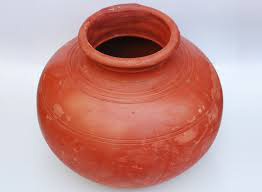

In [12]:
PIL.Image.open(str(matka[0]))

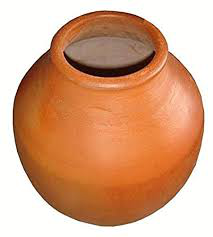

In [13]:
PIL.Image.open(str(matka[12]))

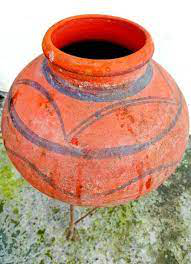

In [14]:
PIL.Image.open(str(matka[35]))

In [15]:
test_matka = image.load_img('/home/piyush/.keras/datasets/containers/matka/images (11).jpg')

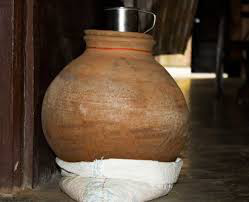

In [16]:
test_matka

In [17]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
for fname in os.listdir('/home/piyush/.keras/datasets/containers/glass'):
  print(fname)

images (17).jpg
images (16).jpg
images (10).jpg
images (27).jpg
images (23).jpg
images (21).jpg
2Q==.jpg
Z.jpg
images (14).jpg
images (6).jpg
images (29).jpg
images.jpg
images (9).jpg
images (18).jpg
images (4).jpg
images (1).jpg
images (12).jpg
Z (1).jpg
images (2).jpg
images (7).jpg
images (5).jpg
images (3).jpg
images (15).jpg
images (28).jpg
images (22).jpg
images (8).jpg
images (30).jpg
images (13).jpg
images (19).jpg
images (26).jpg
images (24).jpg
images (11).jpg
images (20).jpg
9k=.jpg
images (25).jpg
2Q== (1).jpg


In [18]:
gla = load_img('/home/piyush/.keras/datasets/containers/glass/images (19).jpg')


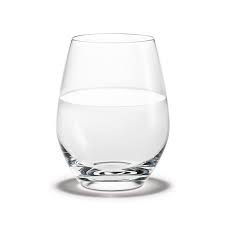

In [19]:
gla

In [63]:
batch_size = 6
epochs = 40
IMG_HIEGHT = 150
IMG_WIDHT = 150

In [64]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.2)

In [65]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 87 images belonging to 3 classes.


In [66]:
train_data_gen.class_indices

{'cup': 0, 'glass': 1, 'matka': 2}

In [67]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [68]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 21 images belonging to 3 classes.


In [69]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(3,activation='softmax')
])

In [70]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)       

In [71]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [72]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,verbose=1)

Epoch 1/40
15/15 [==============================] - 4s 35ms/step - loss: 3.2917 - accuracy: 0.2337 - val_loss: 1.0853 - val_accuracy: 0.3333
Epoch 2/40
15/15 [==============================] - 0s 29ms/step - loss: 1.0050 - accuracy: 0.4033 - val_loss: 0.7369 - val_accuracy: 0.6667
Epoch 3/40
15/15 [==============================] - 0s 28ms/step - loss: 0.6494 - accuracy: 0.6587 - val_loss: 0.5372 - val_accuracy: 0.6667
Epoch 4/40
15/15 [==============================] - 1s 33ms/step - loss: 1.4673 - accuracy: 0.5008 - val_loss: 0.9531 - val_accuracy: 0.6190
Epoch 5/40
15/15 [==============================] - 0s 27ms/step - loss: 0.9815 - accuracy: 0.4423 - val_loss: 0.7468 - val_accuracy: 0.6667
Epoch 6/40
15/15 [==============================] - 0s 28ms/step - loss: 0.7678 - accuracy: 0.5786 - val_loss: 0.5488 - val_accuracy: 0.7143
Epoch 7/40
15/15 [==============================] - 0s 28ms/step - loss: 0.4972 - accuracy: 0.7076 - val_loss: 0.4629 - val_accuracy: 0.7143
Epoch 8/40
15

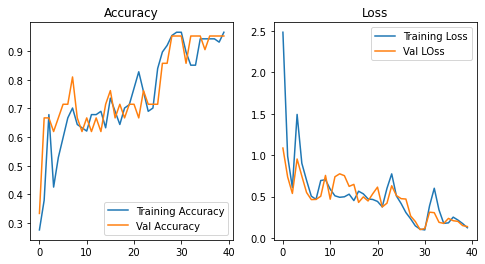

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [74]:
tf.keras.models.save_model(model,'containers.h5')

In [75]:
image_1 = load_img('/home/piyush/.keras/datasets/containers/matka/img4.jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))

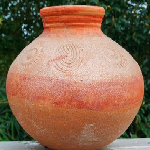

In [76]:
image_1

In [77]:
test_img = img_to_array(image_1)

In [78]:
test_img


array([[[ 24.,  59.,  39.],
        [ 28.,  39.,  23.],
        [  8.,  31.,  13.],
        ...,
        [ 40.,  61.,  46.],
        [ 37.,  52.,  31.],
        [ 32.,  47.,  26.]],

       [[ 41.,  69.,  55.],
        [ 21.,  33.,  19.],
        [ 13.,  35.,  22.],
        ...,
        [ 28.,  50.,  29.],
        [ 34.,  50.,  23.],
        [ 29.,  46.,  14.]],

       [[ 53.,  75.,  63.],
        [ 28.,  49.,  34.],
        [  9.,  36.,  21.],
        ...,
        [ 11.,  34.,  14.],
        [ 32.,  52.,  24.],
        [ 26.,  44.,   6.]],

       ...,

       [[167., 180., 188.],
        [162., 175., 183.],
        [158., 171., 179.],
        ...,
        [193., 196., 201.],
        [189., 192., 197.],
        [196., 201., 207.]],

       [[164., 175., 181.],
        [165., 176., 182.],
        [168., 179., 185.],
        ...,
        [192., 197., 203.],
        [192., 197., 203.],
        [196., 201., 207.]],

       [[173., 184., 190.],
        [171., 182., 188.],
        [169., 1

In [79]:
test_img.shape

(150, 150, 3)

In [80]:
test_img = test_img.reshape(1,150,150,3)

In [81]:
test_img.shape

(1, 150, 150, 3)

In [82]:
model.predict(test_img)

array([[0., 0., 1.]], dtype=float32)

In [83]:
image_2 = load_img('/home/piyush/.keras/datasets/containers/glass/images (24).jpg',target_size=(IMG_HIEGHT,IMG_WIDHT))

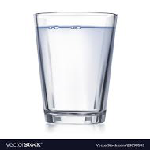

In [84]:
image_2

In [85]:
test_img = img_to_array(image_2)


In [86]:
test_img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        ...,
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.]],

       [[ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        ...,
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        [ 17.,  18.,  36.]],

       [[ 17.,  18.,  36.],
        [ 17.,  18.,  36.],
        [ 17.,  

In [87]:
test_img.shape

(150, 150, 3)

In [88]:
test_img = test_img.reshape(1,150,150,3)

In [89]:
test_img.shape

(1, 150, 150, 3)

In [90]:
model.predict(test_img)

array([[0., 1., 0.]], dtype=float32)